<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PROYECTO/Proyecto_Ton/Proyecto_Ton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

raul.benitez@upc.edu

# Proyecto análisis exploratorio de datos:

##Parte 1: Base de datos



###A) Descripción base de datos.

Esta base de datos recoplia información de los estudiantes de un máster MBA. Aporta datos como, la media de sus notas en distintos cursos y su salario actual. También aporta valores categóricos como el género, especializaciones y si tienen experiencia laboral. Además tiene cierta similutd con la situación en la que nos encontramos en este curso.

Fuente: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

###B) Resumen de la base de datos.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/data_course/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [0]:
df.shape

(215, 15)

In [0]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

Descripción de las columnas:

1. sl_no: Serial number
2. gender: género (M/F)
3. ssc_p: Secondary Education percentage
4. ssc_b: Board of education
5. hsc_p: High Secondary Education percentage
6. hsc_b: board education
7. hsc_s: Espezialization
8. degree_p: Degree percentage
9. degree_t: undergraduation type 
10. work_ex: work experience
11. estest_p: Employment test percentage
12. specialization: specialization
13. mba_p: mba percentage
14. status: estado(Placement/No placement)
15. salary: salario

In [0]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [0]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


###C) Valores NaN.

In [0]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [5]:
df_nan= df.dropna()
df_nan.shape

(148, 15)

En esta descripción podemos observar que sólo existen NaNs en la columna **salary** lógicamente los estudiantes que no trabajan no tienen salario.

Cómo **salary** es una de las características más importantes de esta base de datos y objetivo de análisis, si rellenamos los NaN con media nos va a "manchar" los análisis posteriores, por lo tanto, procederemos a eliminar estos valores.

###D) Representaciones gráficas.

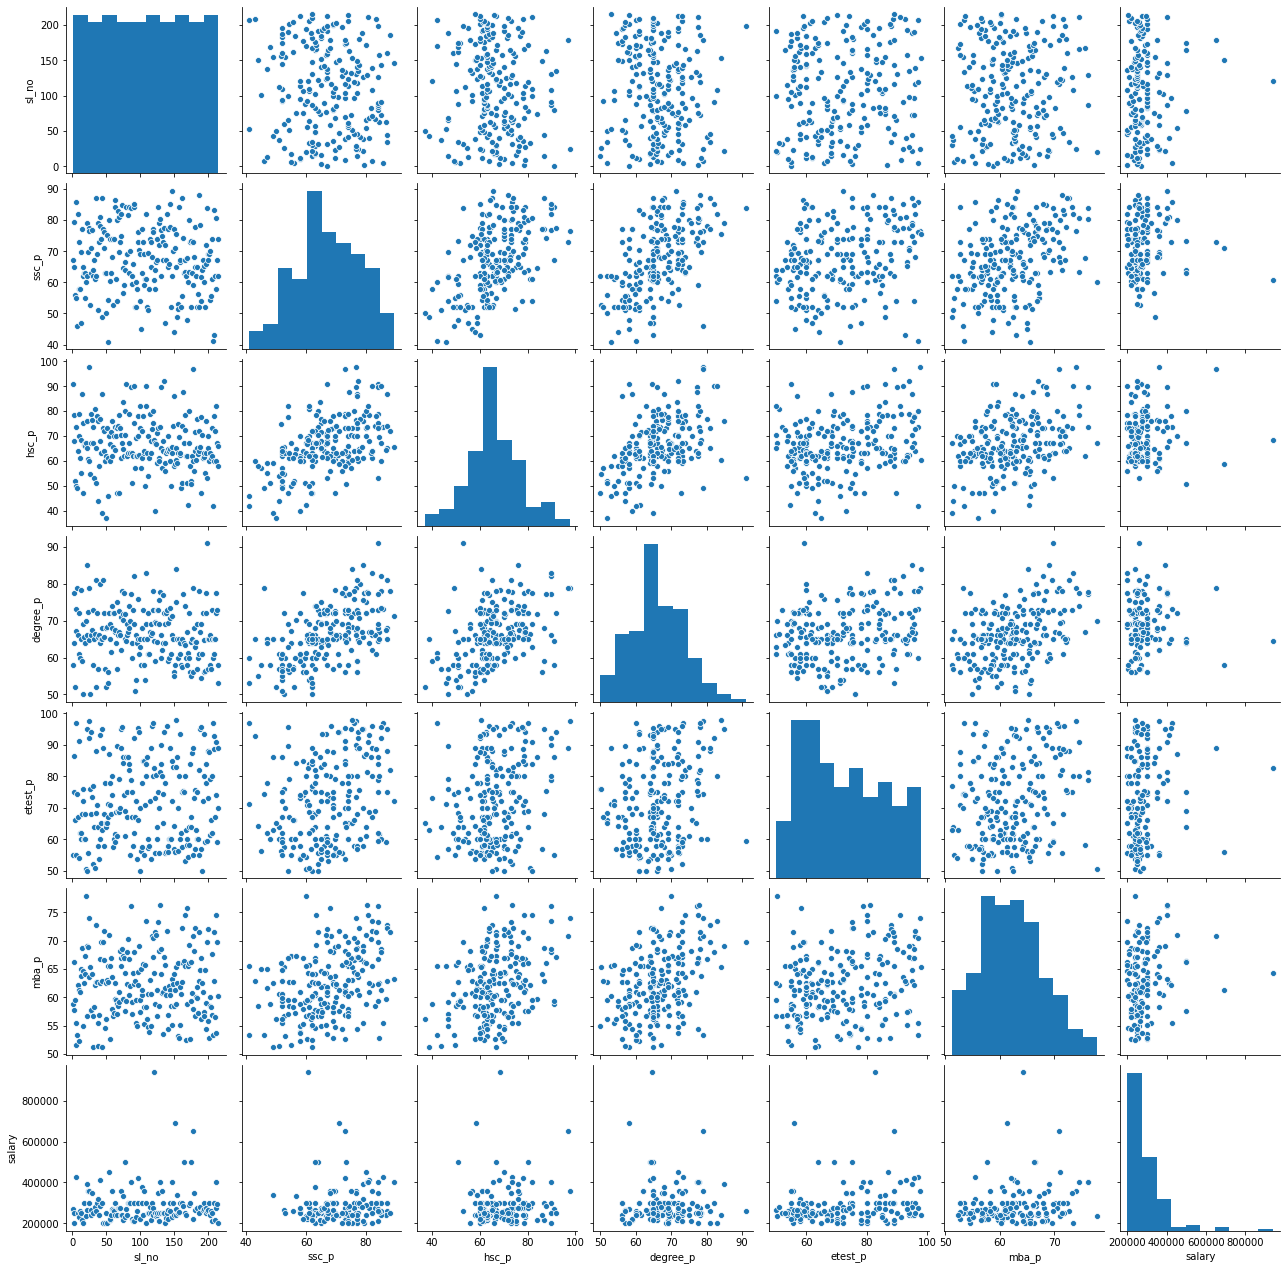

In [0]:
sns.pairplot(df)

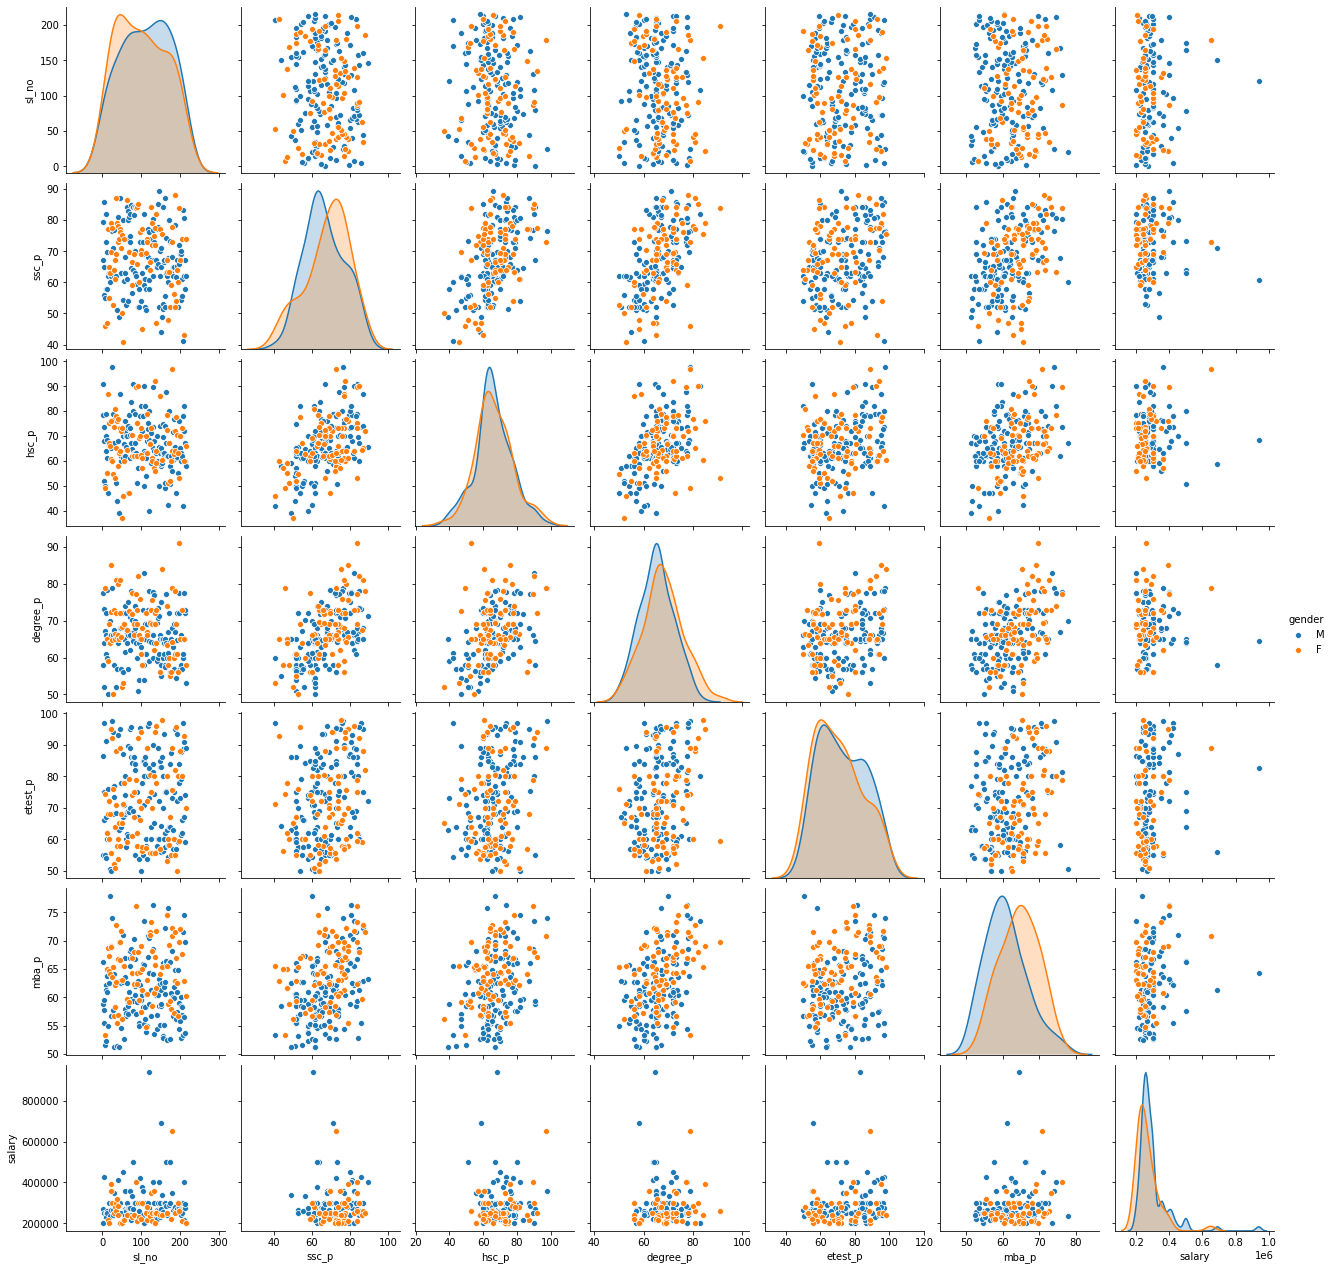

In [0]:
sns.pairplot(df, hue='gender')

##Parte 2: Exploración con Pandas:

###A1) ¿Existe diferencia salarial entre hombre y muejeres?

In [0]:
df_genero = df_nan.groupby(by=['gender'])
df_genero.mean()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
gender,,,,,,,
F,99.979167,73.922708,70.244375,70.596875,70.734167,64.617292,267291.666667
M,110.190000,70.664900,69.774000,67.849500,74.439900,61.601200,298910.000000


Existe una diferencia de salario entre hombre y muejeres de **31618**.

###A2) ¿El estudiante que ha sacado más nota, tiene más salario?

In [0]:
df_nan['salary'].values.max()

940000.0

In [0]:
df_est_oro = df_nan.loc[df_nan['salary']==940000]
df_est_oro

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


In [0]:
df_nan['mba_p'].values.max()

77.89

In [0]:
df_est_top = df_nan.loc[df_nan['mba_p']==77.89]
df_est_top

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
19,20,M,60.0,Others,67.0,Others,Arts,70.0,Comm&Mgmt,Yes,50.48,Mkt&Fin,77.89,Placed,236000.0


###A3) ¿Cúal crees que es el factor que determina tener un salario más alto, el sexo, la especialización o la experiencia laboral?

In [0]:
Dhr = df_nan.loc[df_nan['specialisation']=='Mkt&HR']
Dhr_sal = Dhr['salary'].mean()
Dfin = df_nan.loc[df_nan['specialisation']=='Mkt&Fin']
Dfin_sal = Dfin['salary'].mean()
Dfin_hr = Dfin_sal - Dhr_sal
print('La media de salario de finanzas es {}, la de recursos humanos es {} y la diferencia es {}'.format(Dfin_sal,Dhr_sal,Dfin_hr))

La media de salario de finanzas es 298852.63157894736, la de recursos humanos es 270377.358490566 y la diferencia es 28475.273088381335


In [0]:
DM = df_nan.loc[df_nan['gender']=='M']
DM_sal = DM['salary'].mean()
DF = df_nan.loc[df_nan['gender']=='F']
DF_sal = DF['salary'].mean()
DM_F = DM_sal - DF_sal
print('La media de salario de los hombres es {}, la de las muejeres es {} y la diferencia es {}'.format(DM_sal,DF_sal,DM_F))

La media de salario de los hombres es 298910.0, la de las muejeres es 267291.6666666667 y la diferencia es 31618.333333333314


In [0]:
DYes = df_nan.loc[df_nan['workex']=='Yes']
DYes_sal = DYes['salary'].mean()
DNo = df_nan.loc[df_nan['workex']=='No']
DNo_sal = DNo['salary'].mean()
DYes_No = DYes_sal - DNo_sal
print('La media de salario de los trabajadores con experiéncia es {}, la de los no experimentados es {} y la diferencia es {}'.format(DYes_sal,DNo_sal,DYes_No))

La media de salario de los trabajadores con experiéncia es 303265.625, la de los no experimentados es 277523.8095238095 y la diferencia es 25741.815476190473


Después de obtener los resultados podemos ver un par de datos cuirosos: 

* El salario más alto se los llevan las personas que ya han trabajado anteriormente, con una media de **303265**.

* En cambio, la diferencia más grande se encuentra en el género dónde la diferencia de sueldo entre un hombre y una mujer es de **31618**.

Esto puede ser por la diferencia de muestra a la hora de calcular la media, vamos a ver cúantos estudiantes hay en cada agrupación.

In [0]:
print('Estudiantes de HR:',Dhr.shape[0])
print('Estudiantes de Fin:',Dfin.shape[0])
print('Suma:',Dhr.shape[0] + Dfin.shape[0])
print('Estudiantes de sexo masculino:',DM.shape[0])
print('Estudiantes de sexo femenino:',DF.shape[0])
print('Suma:',DM.shape[0] + DF.shape[0])
print('Estudiantes con experiencia laboral:',DYes.shape[0])
print('Estudiantes sin experiencia laboral:',DNo.shape[0])
print('Suma:',DYes.shape[0] + DNo.shape[0])


Estudiantes de HR: 53
Estudiantes de Fin: 95
Suma: 148
Estudiantes de sexo masculino: 100
Estudiantes de sexo femenino: 48
Suma: 148
Estudiantes con experiencia laboral: 64
Estudiantes sin experiencia laboral: 84
Suma: 148


###B) Representaciones gráficas

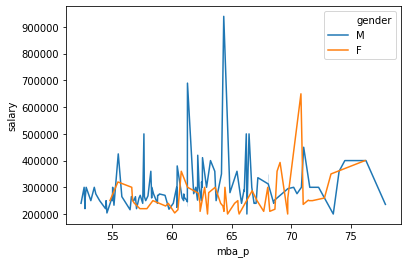

In [0]:
ax = sns.lineplot(x='mba_p',y='salary',data=df_nan,hue='gender')

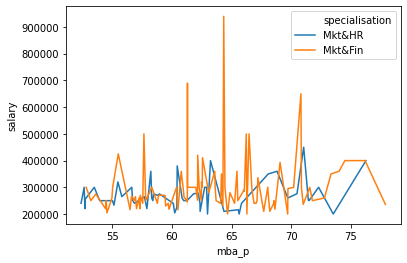

In [0]:
ax = sns.lineplot(x='mba_p',y='salary',data=df_nan,hue='specialisation')

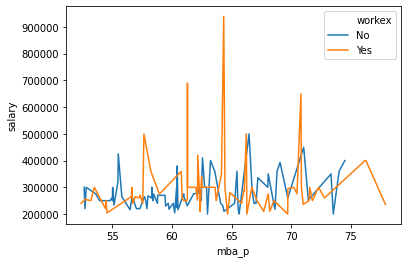

In [0]:
ax = sns.lineplot(x='mba_p',y='salary',data=df_nan,hue='workex')

##Parte 3: Reducción de dimensionalidad y selección de atributos:

###A) Aplicar PCA.

In [6]:
df_num= df_nan.select_dtypes(include='number')
df_num.shape

(148, 7)

In [7]:
df_num.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [0]:
df_num=df_num.drop('sl_no',1)

In [0]:
df_num.shape

(148, 6)

In [9]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(df_num)
XS.shape

(148, 6)

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6).fit(XS)

In [11]:
Xproj = pca.transform(XS)
Xproj.shape

(148, 6)

In [12]:
print('Valores propios = {} {} {} {} {} {}'.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {} {} {} {} {}'.format(*pca.explained_variance_ratio_))

Valores propios = 2.364603129574215 1.0708159224513902 0.8279575696435955 0.7206050077425077 0.600736554712757 0.45609814240614627
Fracción de la varianza explicada = 0.39143768023356945 0.1772634466220207 0.13706054362343303 0.11928934249791513 0.09944625398961181 0.0755027330334499


In [13]:
100*pca.explained_variance_ratio_.cumsum()

array([ 39.14376802,  56.87011269,  70.57616705,  82.5051013 ,
        92.4497267 , 100.        ])

Necesitamos 5/6 varables para explciar el 90% de los datos. Por lo tanto no podemos reducir la dimensión de esta BBDD con PCA.

###B) Representación gráfica. 

In [0]:
XPCA = Xproj[:,0:5]
XPCA.shape

(148, 5)

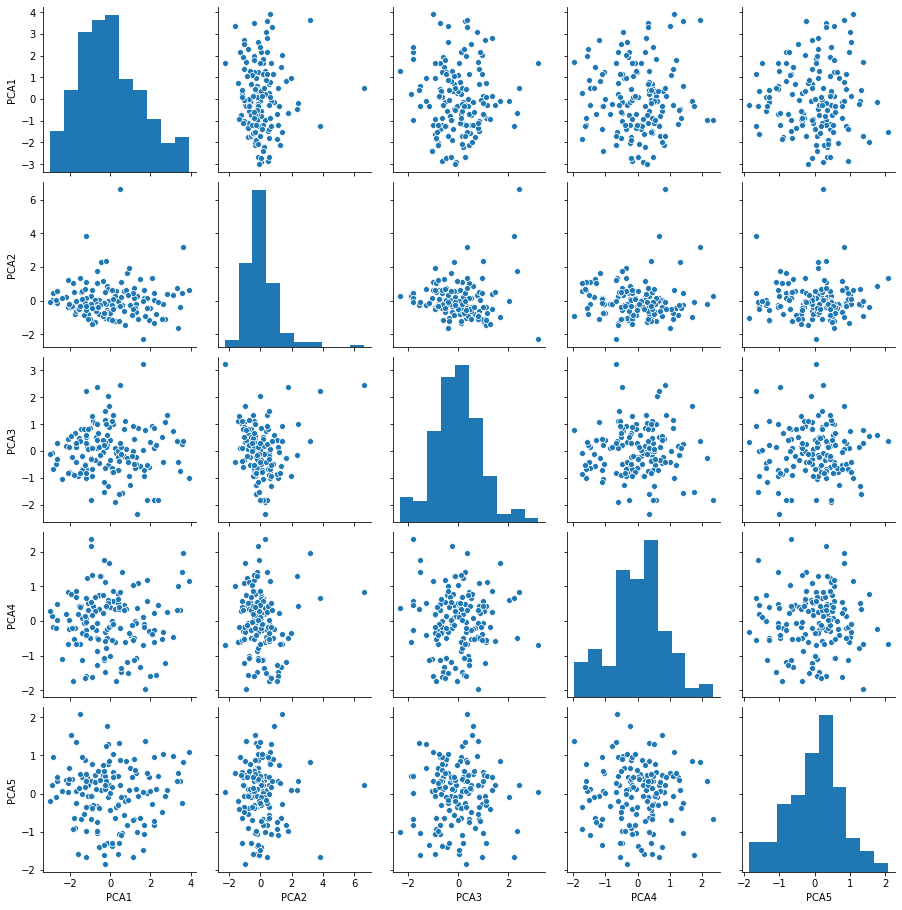

In [0]:
d = pd.DataFrame(XPCA,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])
sns.pairplot(d)
plt.show()

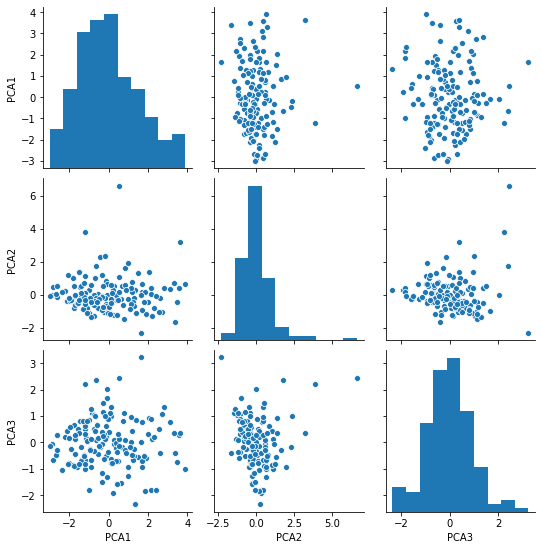

In [16]:
XPCB = Xproj[:,0:3]
XPCB.shape

d = pd.DataFrame(XPCB,columns=['PCA1','PCA2','PCA3'])
sns.pairplot(d)
plt.show()

###C) Agglomerative.

In [17]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(df_num) 
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##Parte 4: Análisis de grupos:

###A) Número óptimo de grupos con GMM.

[2518.3924809956798]
[2518.3924809956798, 2530.7953049975486]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032, 2528.2087421823776]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032, 2528.2087421823776, 2544.2703423802]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032, 2528.2087421823776, 2544.2703423802, 2552.246283249628]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032, 2528.2087421823776, 2544.2703423802, 2552.246283249628, 2544.682561835238]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032, 2528.2087421823776, 2544.2703423802, 2552.246283249628, 2544.682561835238, 2610.783368911794]
[2518.3924809956798, 2530.7953049975486, 2483.622197897006, 2578.8214712771032, 2528.2087421823776, 2544.2703423802,

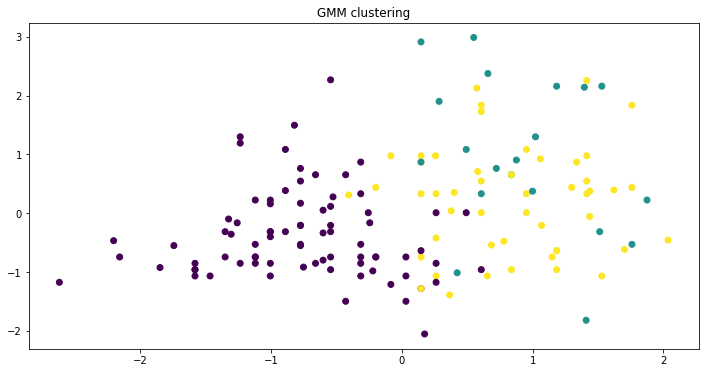

In [25]:
import numpy as np

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(XS)
    bic.append(gmm.bic(XS))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(XS)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(XS)
plt.scatter(XS[:, 0], XS[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

Con GMM nos da un número óptimo de 3 grupos.

###B y C) Comparar resultado con k-means, agrupamiento jerárquico y GMM.

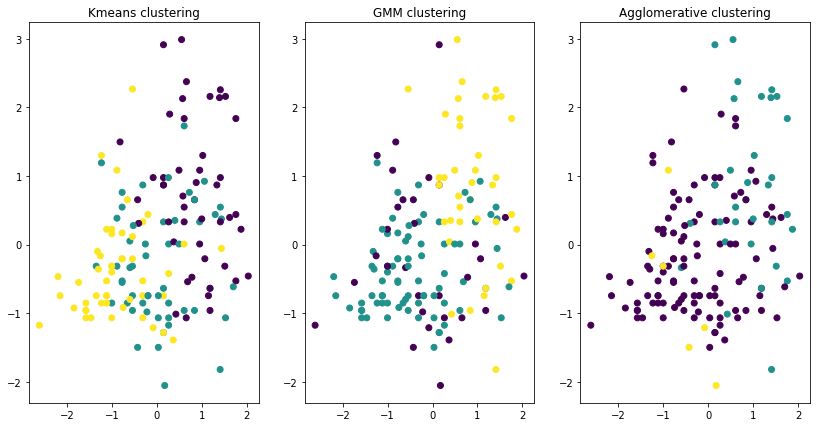

In [28]:
from sklearn.cluster import KMeans

# Kmeans clustering:
clust_kmeans = KMeans(n_clusters=3, random_state=170).fit_predict(XS)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=3).fit_predict(XS) 


# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(XS)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(XS[:, 0], XS[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(XS[:, 0], XS[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(XS[:, 0], XS[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

##Parte 5: Regresión univariada:

###A) Aplicar regresión univariada a variables númericas con correlación.

In [36]:
import statsmodels.api as sm
x = XS[:,0]
y = XS[:,1]

X = sm.add_constant(x)

# Modelo 1 (Lineal): y = a*x + b
model1 = sm.OLS(y, X)
model1 = model1.fit()

# Modelo 2 (Cuadrático): y = a*x^2 + b*x + c
X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
model2 = model2.fit()

# Modelo 2 (Orden 3):  y = a*x^3 + b*x^3 + c*x + d
X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
model3 = model3.fit()

print('Model 1 AIC: ',model1.bic)
print('Model 2 AIC: ',model2.bic)
print('Model 3 AIC: ',model3.bic)

Model 1 AIC:  416.6763349573043
Model 2 AIC:  421.159083703788
Model 3 AIC:  426.0473842434996


###B) Representación gràfica.

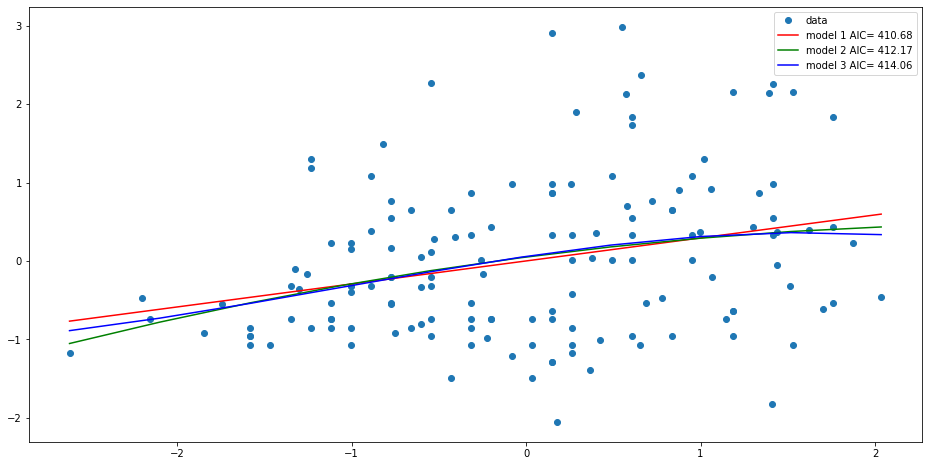

In [37]:

x_predict = np.linspace(x.min(),x.max(),10)
X_pred = sm.add_constant(x_predict) # adds a first column to add an intercept (beta_0) to our model
X2_pred = np.column_stack((x_predict, x_predict**2))
X2_pred = sm.add_constant(X2_pred) # adds a first column to add an intercept (beta_0) to our model
X3_pred = np.column_stack((x_predict, x_predict**2,x_predict**3))
X3_pred = sm.add_constant(X3_pred) # adds a first column to add an intercept (beta_0) to our model

y1_predict = model1.predict(X_pred)
y2_predict = model2.predict(X2_pred)
y3_predict = model3.predict(X3_pred)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x_predict, y1_predict, 'r-', label="model 1 AIC= {:.5}".format(model1.aic))
ax.plot(x_predict, y2_predict, 'g-', label="model 2 AIC= {:.5}".format(model2.aic))
ax.plot(x_predict, y3_predict, 'b-', label="model 3 AIC= {:.5}".format(model3.aic))
ax.legend()
plt.show()